 # **Diabetes Prediction**


In [265]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Collection**

In [266]:
# loading dataset using pandas
dataset = pd.read_csv("/content/pima-indians-diabetes.csv")
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [267]:
# since there is no column name for this dataset
dataset.columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "PedigreeFunction", "Age", "Outcome"]
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [268]:
# checking rows and columns
dataset.shape

(767, 9)

In [269]:
# checking for null values
dataset.isnull().sum()

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
PedigreeFunction    0
Age                 0
Outcome             0
dtype: int64

In [270]:
# getting some statistical measures
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


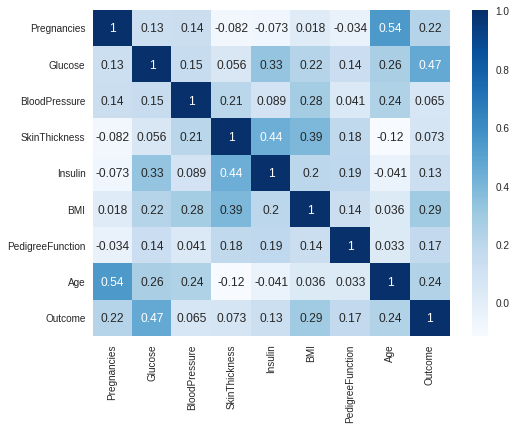

In [271]:
# checking for correlation values using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')

**Data Visualisation**

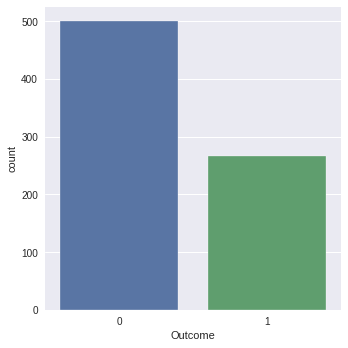

In [272]:
# Diabetes value counts
sns.catplot(data=dataset, x="Outcome", kind="count")

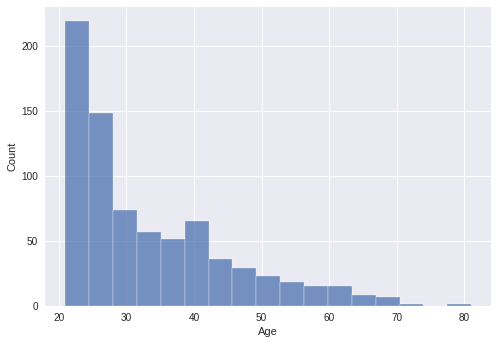

In [273]:
# age distribution
sns.histplot(dataset["Age"], fill=True)

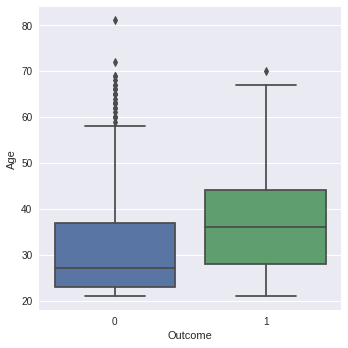

In [274]:
# Age vs Outcome
sns.catplot(data=dataset, x="Outcome", y="Age", kind="box")

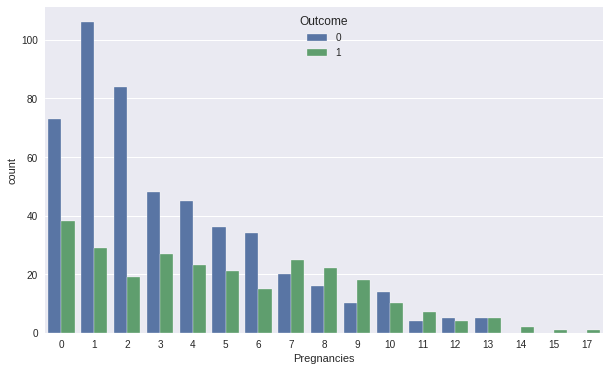

In [275]:
# Pregnencies count
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="Pregnancies",  hue="Outcome")

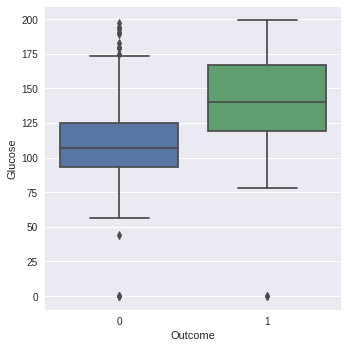

In [276]:
# Glucose vs Outcome
sns.catplot(data=dataset, x="Outcome", y="Glucose", kind="box")

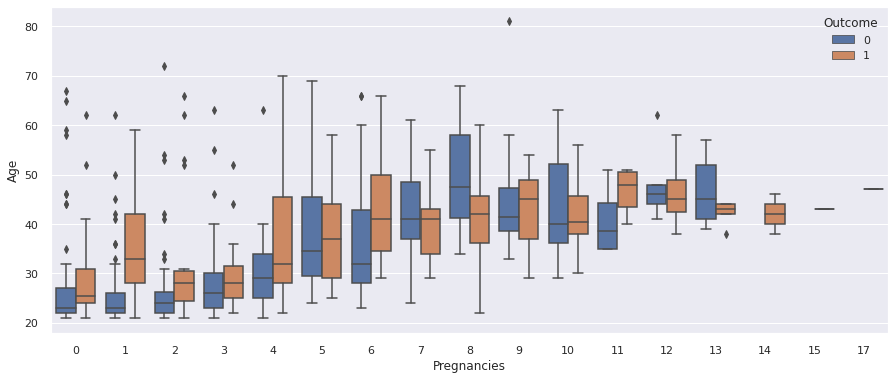

In [277]:
# Pregnancy vs Age in terms of 
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(data=dataset, x='Pregnancies', y='Age', hue='Outcome')

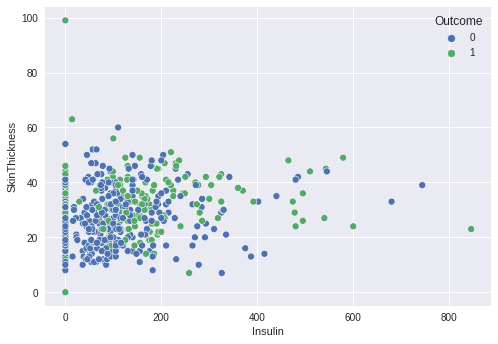

In [278]:
# skinThickness vs Insulin
plt.style.use('seaborn')
sns.scatterplot(data=dataset, y="SkinThickness", x="Insulin", hue='Outcome')

**Data Processing**

In [279]:
# Splitting dependent values and target label
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [280]:
# splitting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [281]:
# scaling the values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [282]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**Model Training and Evaluation**

In [311]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_class.fit(X_train, Y_train)
rf_score = rf_class.score(X_test, Y_test)
rf_score

0.7857142857142857

In [312]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb_class = GaussianNB()
gnb_class.fit(X_train, Y_train)
gnb_score = gnb_class.score(X_test, Y_test)
gnb_score

0.7792207792207793

In [313]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_class = LogisticRegression()
lr_class.fit(X_train, Y_train)
lr_score = lr_class.score(X_test, Y_test)
lr_score

0.7727272727272727

In [314]:
# SVM
from sklearn.svm import SVC
svm_class = SVC()
svm_class.fit(X_train, Y_train)
svm_score = svm_class.score(X_test, Y_test)
svm_score

0.7987012987012987

In [315]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors=18, p=2)
knn_class.fit(X_train, Y_train)
knn_score = knn_class.score(X_test, Y_test)
knn_score

0.8051948051948052

**Conclusion**

In [317]:
# creating a new DataFrame
result = pd.DataFrame({
    'Model':['RandomForestClassifier', 'GaussianNB', 'LogisticRegression', 'SVM', 'KNeighborsClassifier'],
    'Score':[round(rf_score*100, 2), round(gnb_score*100, 2), round(lr_score*100, 2), round(svm_score*100, 2), round(knn_score*100, 2)]
})

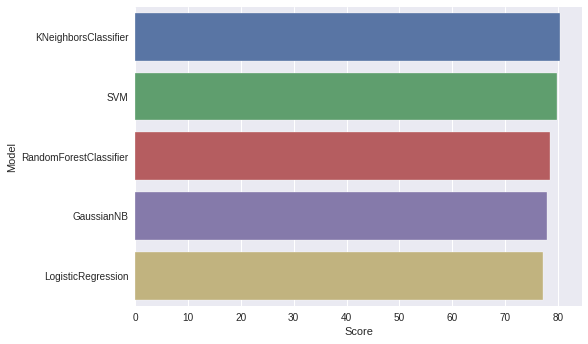

In [319]:
# plotting the graph for Score
sns.barplot(data=result.sort_values(by='Score', ascending=False), x='Score', y='Model')

In [320]:
# Modified DataFrame
result["Score"] = result["Score"].apply(lambda cell: str(cell)+"%")
result

,Model,Score
0,RandomForestClassifier,78.57%
1,GaussianNB,77.92%
2,LogisticRegression,77.27%
3,SVM,79.87%
4,KNeighborsClassifier,80.52%


Text(51.0, 0.5, 'Actual Values')

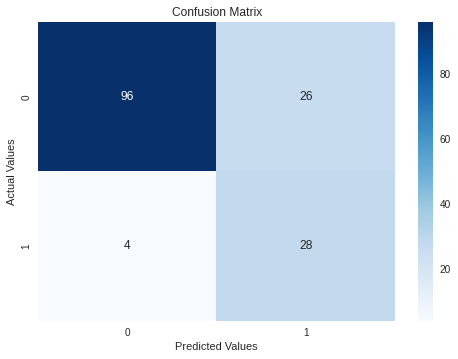

In [325]:
# confusion matrix for KNeighborsClassifier
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(knn_class.predict(X_test), Y_test)
sns.heatmap(c_mat, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

KNeighborsClassifier model performing better compared to others

**Making Predictive System**

In [332]:
input_data = list(map(float, input().split(',')))    # input format: pregnancy,glucose,bp,skinthickness,insulin,bmi,pedigreefunction,age 
lst = [[input_data[0], input_data[1], input_data[2], input_data[3], input_data[4], input_data[5], input_data[6], input_data[7]]]
lst_trans = scale.transform(lst)
pred = knn_class.predict(lst_trans)

if pred[0] == 1:
  print("The Person Have Diabetes")
else:
  print("The Person Dose not Have Diabetes")

0 ,37,40,35,168,43,1,2.288,33
The Person Dose not Have Diabetes
